# Euro 2020 (2021) Predictions

<!-- Written report for this analysis can be found [here](../reports/boro_01_market_value.md) -->

## 1. Business Understanding

* Determine Busines Objectives
* Situation Assessment
* Determine Data Mining Goal
* Produce Project Plan

```
# 1. Predict results of every match at Euro 2020
# 2. Make predictions before each round of competition
# 3. Ideally, at each round, use the predictions to simulate remainder of competition
# 4. Check against other predictions and actual results
# 5. Write up process (report/blog)
```

## 2. Data Understanding

* Collect Initial Data
* Describe Data
* Explore Data
* Verify Data Quality

In [1]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
sns.set()

import src.utilities as utilities

In [2]:
match = utilities.get_master("nations_matches")
# match.info()

match = match[['Round', 'Day', 'Date', 'Time', 'Team_1', 'Team_2',
       'Year', 'Goals_1', 'Goals_2',
       'Goal_diff', 'Venue', 'Venue_country', 'Venue_city', 'Home_1',
       'Home_2']]

match["Goal_total"] = match.Goals_1 + match.Goals_2
match["Result"] = None
match.loc[match.Goals_1 == match.Goals_2, "Result"] = "Draw"
match.loc[match.Goals_1 > match.Goals_2, "Result"] = "Win"
match.loc[match.Goals_1 < match.Goals_2, "Result"] = "Loss"

match.describe(include="all").T

2021-07-05 15:18:36,789 - INFO - Building master filepath for nations_matches
2021-07-05 15:18:36,793 - INFO - Fetching C:\Users\adeacon\Documents\GitHub\the-ball-is-round\data\processed\ftb_nations_matches.txt
2021-07-05 15:18:36,794 - INFO - Building master filepath for nations_matches


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Round,225,5,Group stage,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,225,7,Sun,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,225,118,2016-06-22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,225,16,20:45 (19:45),52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team_1,225,35,Portugal,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team_2,225,35,Portugal,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,225,NaN,NaN,NaN,2011.6,7.25,2000,2004,2012,2016,2021
Goals_1,223,NaN,NaN,NaN,1.41256,1.3084,0,0,1,2,6
Goals_2,223,NaN,NaN,NaN,1.22422,1.11256,0,0,1,2,5
Goal_diff,223,NaN,NaN,NaN,0.188341,1.8085,-5,-1,0,1,5



Goals_1



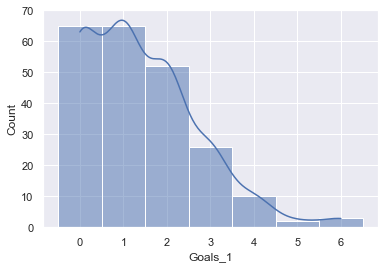


--------------------

Goals_2



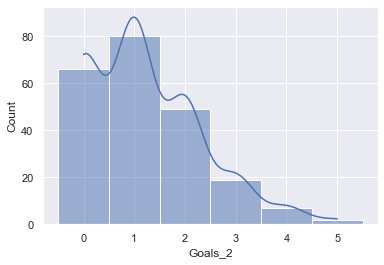


--------------------

Goal_diff



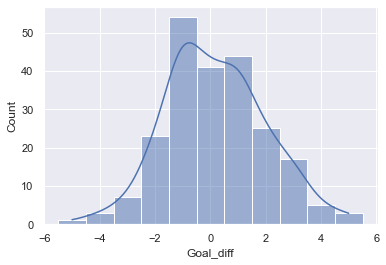


--------------------

Goal_total



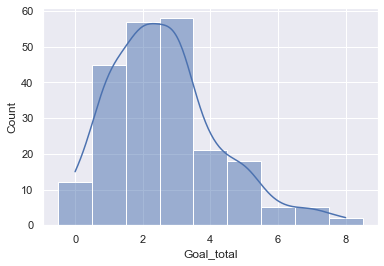


--------------------


In [3]:
def metric_histograms(df, metrics, discrete=False):
#     df = df_in.dropna(subset=[metric]).fillna("NULL")
    for metric in metrics:
        print("\n{0}\n".format(metric))
#         df[metric].hist()
        sns.histplot(data=df, x=metric, kde=True, discrete=discrete)
        plt.show()
#         sns.boxplot(x=df[metric])
#         plt.show()
        print("\n--------------------")

metric_histograms(match, ["Goals_1", "Goals_2", "Goal_diff", "Goal_total"], discrete=True)


Round

Group stage       168
Quarter-finals     24
Round of 16        16
Semi-finals        10
Final               5
Name: Round, dtype: int64


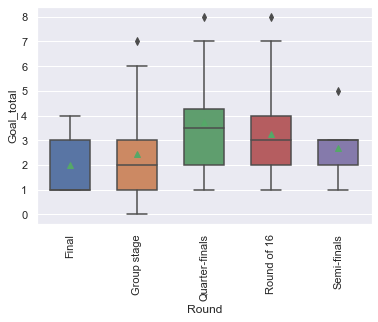


--------------------

Day

Sun    43
Sat    40
Wed    34
Mon    32
Tue    28
Fri    24
Thu    22
Name: Day, dtype: int64


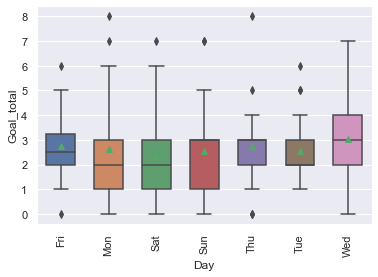


--------------------

Time

20:45 (19:45)    52
18:00 (17:00)    48
21:00 (20:00)    40
19:45            23
17:00            12
21:45 (19:45)    11
15:00 (14:00)    10
19:00 (17:00)     7
20:00             5
22:00 (20:00)     4
20:00 (17:00)     3
14:00             3
16:00 (14:00)     2
20:00 (19:00)     1
14:30 (13:30)     1
17:00 (14:00)     1
Name: Time, dtype: int64


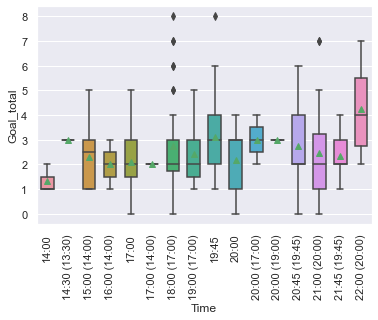


--------------------

Year

2016    51
2021    48
2012    31
2008    31
2004    31
2000    31
Name: Year, dtype: int64


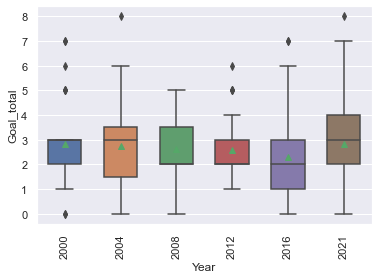


--------------------

Venue_country

NULL           92
France         45
Netherlands    16
Ukraine        16
Belgium        15
Austria        13
Switzerland    12
Poland         11
Germany         1
Russia          1
Italy           1
Name: Venue_country, dtype: int64


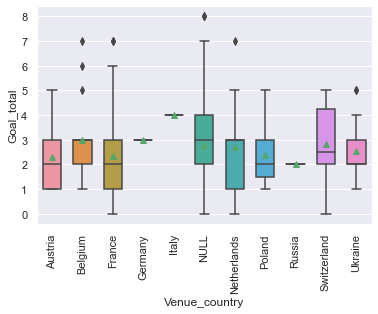


--------------------

Result

Win     94
Loss    88
Draw    41
Name: Result, dtype: int64


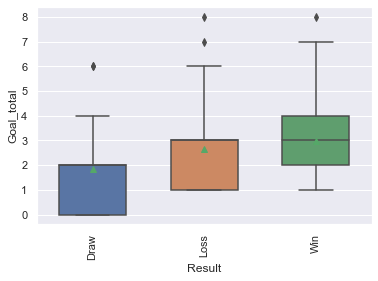


--------------------


In [4]:
def group_boxplots(df_in, cols, metric):
    df = df_in.dropna(subset=[metric]).fillna("NULL")
    for col in cols:
        print("\n{0}\n".format(col))
        print(df[col].value_counts())
        sns.boxplot(x=col, y=metric, data=df.sort_values(by=col), 
                    showmeans=True, width=0.6)
        plt.xticks(rotation=90)

    #     plt.savefig("../reports/figures/club_01_boxplot_{0}.PNG".format(col))
        plt.show()
        print("\n--------------------")
        
col_list = ["Round", "Day", "Time", "Year", "Venue_country", "Result"]

group_boxplots(match, col_list, "Goal_total")

In [5]:
summary = utilities.get_master("nations_summaries")
# summary.info()

summary = summary[['Rank Local', 'Rank Global', 'Team', 'Rating',
       'Average Rank', 'Average Rating', '1 Year Change Rank',
       '1 Year Change Rating', 'Matches Total', 'Matches Home', 'Matches Away',
       'Matches Neutral', 'Matches Wins', 'Matches Losses', 'Matches Draws',
       'Goals For', 'Goals Against', 'Year', 'Country',
       'Data Year', 'GDP (PPP)', 'Population']]

summary["GDP (PPP) Per Capita"] = summary['GDP (PPP)'] / summary['Population']

summary.describe(include="all").T

2021-07-05 15:18:38,733 - INFO - Building master filepath for nations_summaries
2021-07-05 15:18:38,734 - INFO - Fetching C:\Users\adeacon\Documents\GitHub\the-ball-is-round\data\processed\ftb_nations_summaries.txt
2021-07-05 15:18:38,734 - INFO - Building master filepath for nations_summaries


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank Local,112,NaN,NaN,NaN,10.1964,6.06398,1,5,10,14.25,24
Rank Global,112,NaN,NaN,NaN,18.6964,14.7769,1,8,15,26,74
Team,112,35,Czech Republic,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,112,NaN,NaN,NaN,1856,122.945,1524,1771.25,1853,1948.25,2127
Average Rank,112,NaN,NaN,NaN,22.5268,16.0921,4,11,19,27.25,83
Average Rating,112,NaN,NaN,NaN,1769.49,128.753,1390,1704.75,1785.5,1875.25,1985
1 Year Change Rank,112,NaN,NaN,NaN,1.41071,5.92073,-15,-2,1,4,23
1 Year Change Rating,112,NaN,NaN,NaN,7.26786,42.6667,-92,-24.25,7.5,35.25,127
Matches Total,112,NaN,NaN,NaN,638.009,214.417,63,537.25,659.5,787,1073
Matches Home,112,NaN,NaN,NaN,285.482,98.4145,23,223,295,360,467



Rating



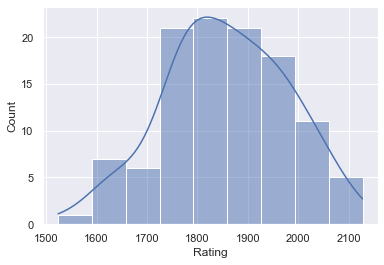


--------------------

Average Rank



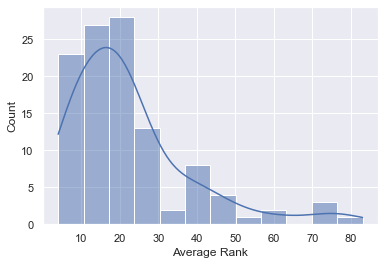


--------------------

Average Rating



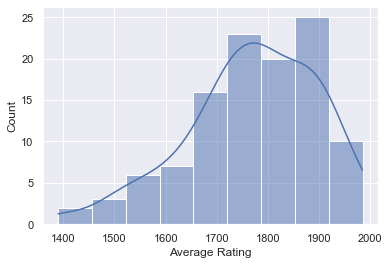


--------------------

1 Year Change Rank



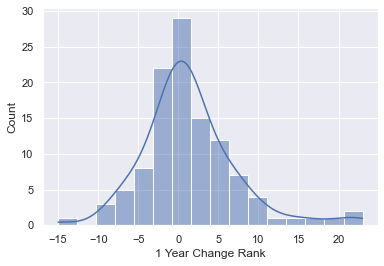


--------------------

1 Year Change Rating



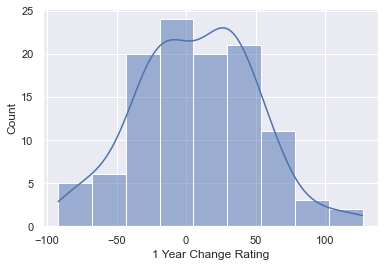


--------------------

Matches Total



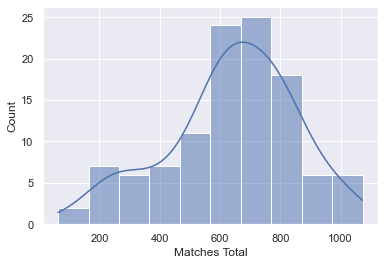


--------------------

Matches Home



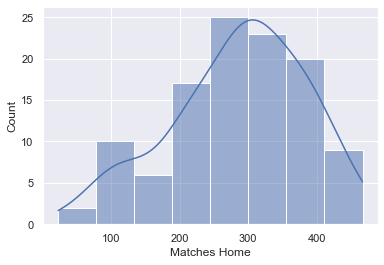


--------------------

Matches Away



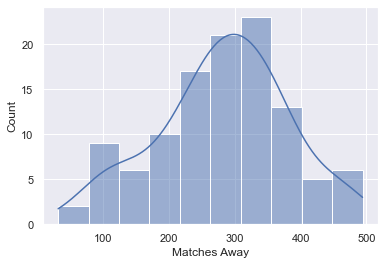


--------------------

Matches Neutral



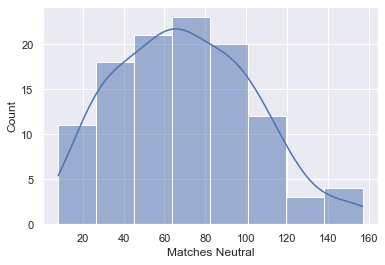


--------------------

Matches Wins



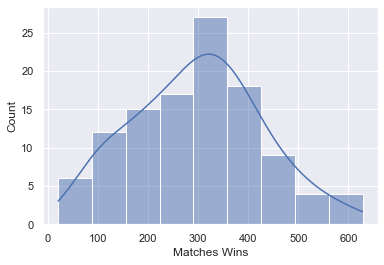


--------------------

Matches Losses



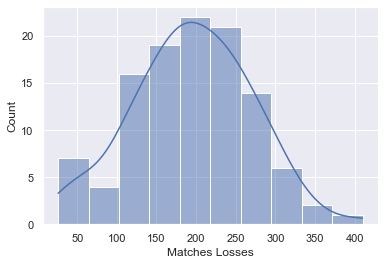


--------------------

Matches Draws



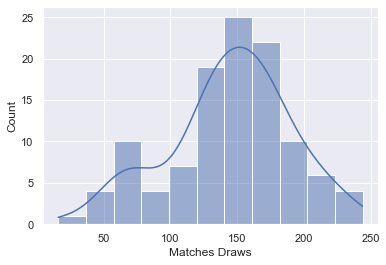


--------------------

Goals For



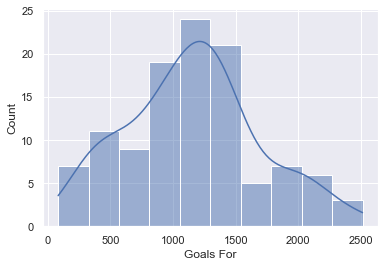


--------------------

Goals Against



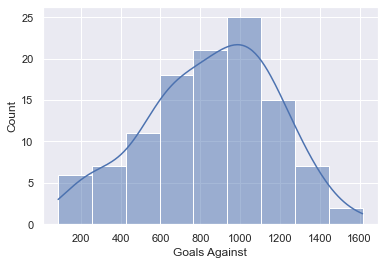


--------------------

GDP (PPP)



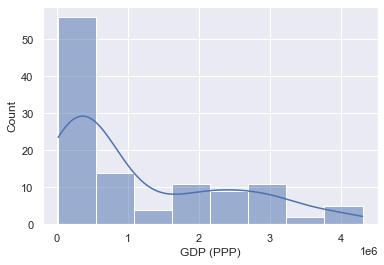


--------------------

Population



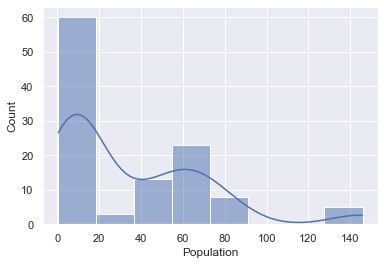


--------------------

GDP (PPP) Per Capita



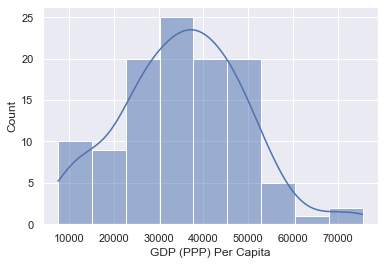


--------------------


In [6]:
metric_histograms(summary, ['Rating', 'Average Rank',
       'Average Rating', '1 Year Change Rank', '1 Year Change Rating',
       'Matches Total', 'Matches Home', 'Matches Away', 'Matches Neutral',
       'Matches Wins', 'Matches Losses', 'Matches Draws', 'Goals For',
       'Goals Against', 'GDP (PPP)',
       'Population', 'GDP (PPP) Per Capita'])

## 3. Data Preperation

* Select Data
* Clean Data
* Construct Data
* Integrate Data
* Format Data

In [7]:
data = match.merge(summary, left_on=["Team_1", "Year"], right_on=["Team", "Year"]) #, suffixes=["", "_1"])
data = data.merge(summary, left_on=["Team_2", "Year"], right_on=["Team", "Year"], suffixes=["", " (2)"])
data.sort_values(by=["Date", "Team_1"], inplace=True)
data.reset_index(drop=True, inplace=True)

data["Elo_rating_diff"] = data["Rating"] - data["Rating (2)"]
data["Home_advantage"] = data["Home_1"] - data["Home_2"]
# data["Win_expectency_1"] = ((10**((-(data.Elo_rating_diff + (100 * data.Home_advantage)))/400))+1)**-1
data["Relative_experience"] = data["Matches Total"] / data["Matches Total (2)"]
data["Relative_population"] = data["Population"] / data["Population (2)"]
data["Relative_GDP_per_capita"] = data["GDP (PPP) Per Capita"] / data["GDP (PPP) Per Capita (2)"]
data["Relative_ELO_rating"] = data["Rating"] / data["Rating (2)"]
# data["Relative_ELO_rank_1yr_change"] = data["1 Year Change Rank"] / data["1 Year Change Rank (2)"]
# data["Relative_ELO_rating_1yr_change"] = data["1 Year Change Rating"] / data["1 Year Change Rating (2)"]
# data["Combined_ELO_rating_1yr_change"] = data["1 Year Change Rating"].abs() + data["1 Year Change Rating (2)"].abs()

# model_years = [2000, 2004, 2008, 2012, 2016]
live_years = [2021]
data["Usage"] = "Training"
data.loc[data.Year.isin(live_years), "Usage"] = "Live"

# data = data[["Date", "Year", "Team_1", "Team_2", "Goal_diff", "Goal_total", "Elo_rating_diff", "Home_advantage", "Win_expectency_1",
#              "Relative_experience", "Relative_population", "Relative_GDP_per_capita",
#             "Relative_ELO_rating"]] #, "Relative_ELO_rank_1yr_change", "Relative_ELO_rating_1yr_change"
# ]]

# data.columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,225.0,2.011600e+03,7.250000e+00,2000.000000,2004.000000,2012.000000,2.016000e+03,2.021000e+03
Goals_1,223.0,1.412556e+00,1.308401e+00,0.000000,0.000000,1.000000,2.000000e+00,6.000000e+00
Goals_2,223.0,1.224215e+00,1.112560e+00,0.000000,0.000000,1.000000,2.000000e+00,5.000000e+00
Goal_diff,223.0,1.883408e-01,1.808501e+00,-5.000000,-1.000000,0.000000,1.000000e+00,5.000000e+00
Home_1,225.0,7.555556e-02,2.648749e-01,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
Home_2,225.0,4.000000e-02,1.963961e-01,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
Goal_total,223.0,2.636771e+00,1.621336e+00,0.000000,1.000000,2.000000,3.000000e+00,8.000000e+00
Rank Local,225.0,9.226667e+00,5.919640e+00,1.000000,4.000000,8.000000,1.300000e+01,2.400000e+01
Rank Global,225.0,1.676444e+01,1.406244e+01,1.000000,7.000000,13.000000,2.200000e+01,7.400000e+01
Rating,225.0,1.876053e+03,1.244909e+02,1524.000000,1788.000000,1875.000000,1.972000e+03,2.127000e+03


In [8]:
skip_cols = [x+" (2)" for x in summary.columns]
# print(skip_cols)
skip_cols = summary.columns.tolist() + skip_cols
# print(skip_cols)
skip_cols = [x for x in skip_cols if x in data.columns ]
# print(skip_cols)

data.drop(columns=skip_cols).corr().style.background_gradient(cmap='coolwarm')

,Goals_1,Goals_2,Goal_diff,Home_1,Home_2,Goal_total,Elo_rating_diff,Home_advantage,Relative_experience,Relative_population,Relative_GDP_per_capita,Relative_ELO_rating
Goals_1,1.000000,-0.110248,0.791296,0.045243,-0.012445,0.731337,0.278898,0.042373,0.075965,0.127540,0.161863,0.276048
Goals_2,-0.110248,1.000000,-0.694945,-0.040502,-0.103003,0.597230,-0.310008,0.029454,-0.047368,0.051130,-0.151633,-0.303109
Goal_diff,0.791296,-0.694945,1.000000,0.057649,0.054362,0.161696,0.392487,0.012537,0.084099,0.060817,0.210386,0.386181
Home_1,0.045243,-0.040502,0.057649,1.000000,-0.058356,0.008718,-0.093865,0.815574,0.001870,0.144111,0.102237,-0.098354
Home_2,-0.012445,-0.103003,0.054362,-0.058356,1.000000,-0.080724,-0.017196,-0.625261,0.032348,-0.027582,0.000873,-0.021964
Goal_total,0.731337,0.597230,0.161696,0.008718,-0.080724,1.000000,0.012340,0.054406,0.028799,0.138009,0.026572,0.014775
Elo_rating_diff,0.278898,-0.310008,0.392487,-0.093865,-0.017196,0.012340,1.000000,-0.063411,0.295935,0.215980,0.227427,0.996976
Home_advantage,0.042373,0.029454,0.012537,0.815574,-0.625261,0.054406,-0.063411,1.000000,-0.017288,0.128646,0.079418,-0.064157
Relative_experience,0.075965,-0.047368,0.084099,0.001870,0.032348,0.028799,0.295935,-0.017288,1.000000,0.157539,0.376697,0.308969
Relative_population,0.127540,0.051130,0.060817,0.144111,-0.027582,0.138009,0.215980,0.128646,0.157539,1.000000,-0.057026,0.229111


In [9]:
# data_lim.corr().style.background_gradient(cmap='coolwarm')

## 4. Modelling

* Select Modelling Technique
* Generate Test Design
* Build Model
* Assess Model

In [10]:
# from sklearn.dummy import DummyRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# # from sklearn.linear_model import BayesianRidge
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# # from sklearn.ensemble import VotingRegressor
# # from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# # from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, RegressorMixin

# from sklearn.metrics import median_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

# # from sklearn.utils import resample
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# # from sklearn.model_selection import learning_curve
# # from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split

# # np.random.seed(1)

In [11]:
class EloRegressor(BaseEstimator, RegressorMixin):
    def __init__(self): #, yType="Diff", goalWeight=4., goalBoost=16.):
        self.yType = "Diff"
        self.goalWeight = 4.
        self.goalBoost = 1.
    
    def _show_params(self):
        print("_show_params...")
        print("yType:", self.yType)
        print("goalWeight:", self.goalWeight)
        print("goalBoost:", self.goalBoost)
        
        return
    
    def _calc_output(self, X):
        X_tmp = X.copy(deep=True)
        X_tmp["EloRatingDiffWithHomeAdv"] = X_tmp["Elo_rating_diff"] + (100 * X_tmp.Home_advantage)
        X_tmp["WinExpectency1Square"] = (10**((-X_tmp.EloRatingDiffWithHomeAdv)/400))+1
        X_tmp["WinExpectency1"] = X_tmp["WinExpectency1Square"]**-1
        X_tmp["RawGoalDiff"] = (self.goalWeight * (X_tmp.WinExpectency1 - 0.5)).round(0)
        X_tmp["RawGoalDiffAbs"] = X_tmp["RawGoalDiff"].abs()
        X_tmp["EitherWins"] = 0
        X_tmp.loc[X_tmp.RawGoalDiffAbs > 0, "EitherWins"] = 1
#         X_tmp["QualifyGoalsRankAvg"] = (X_tmp["QualifyGoalsRank1"] + X_tmp["QualifyGoalsRank2"]) / 2
        X_tmp["ApplyGoalBoost"] = 0
#         X_tmp.loc[X_tmp.QualifyGoalsRankAvg <= self.goalBoost, "ApplyGoalBoost"] = 1
        X_tmp["Goals1"] = X_tmp["ApplyGoalBoost"]
        X_tmp.loc[X_tmp.RawGoalDiff > 0, "Goals1"] = X_tmp.RawGoalDiff + X_tmp.ApplyGoalBoost
        X_tmp["Goals2"] = X_tmp["ApplyGoalBoost"]
        X_tmp.loc[X_tmp.RawGoalDiff <= 0, "Goals2"] = X_tmp.ApplyGoalBoost - X_tmp.RawGoalDiff
        X_tmp["GoalDiff"] = X_tmp.Goals1 - X_tmp.Goals2
        X_tmp["GoalDiffAbs"] = X_tmp.GoalDiff.abs()
        X_tmp["GoalTotal"] = X_tmp.Goals1 + X_tmp.Goals2
        
        return X_tmp["Goal"+self.yType].values

    def fit(self, X, y=None):
        if y.name == "Goal_total":
            self.yType = "Total"
#         else:
#             self.yType = "Diff"
        y_tmp = self._calc_output(X).mean()
        y_low = y.quantile(q=0.2)
        y_high = y.quantile(q=0.8)
        while y_tmp < y_low:
            self.goalWeight += 0.05
            y_tmp = self._calc_output(X).mean()
        while y_tmp > y_high:
            self.goalWeight -= 0.05
            y_tmp = self._calc_output(X).mean()
        self._show_params()
        
        return self

    def predict(self, X, y=None):
        self._show_params()
        return self._calc_output(X)

## 5. Evaluation

* Evaluate Results
* Review Process
* Determine Next Steps

## 6. Deployment

* Plan Deployment
* Plan Monitoring and Maintenance
* Produce Final Report
* Review Project

In [12]:
pickle_base = "../models/intl_02_{0}.pkl"

print("Un-Pickling files...")

with open(pickle_base.format("gd_model"), "rb") as pkl_1:
    selected_gd_model = pickle.load(pkl_1)
with open(pickle_base.format("gd_features"), "rb") as pkl_2:
    gd_features = pickle.load(pkl_2)
with open(pickle_base.format("gt_model"), "rb") as pkl_3:
    selected_gt_model = pickle.load(pkl_3)
with open(pickle_base.format("gt_features"), "rb") as pkl_4:
    gt_features = pickle.load(pkl_4)

selected_gd_model, gd_features, selected_gt_model, gt_features

Un-Pickling files...


(EloRegressor(),
 ['Home_advantage',
  'Relative_experience',
  'Relative_population',
  'Relative_GDP_per_capita',
  'Elo_rating_diff'],
 Pipeline(steps=[('standardizer', StandardScaler()), ('estimator', Lasso())]),
 ['Home_advantage',
  'Relative_experience',
  'Relative_population',
  'Relative_GDP_per_capita',
  'Elo_rating_diff'])

In [13]:
output_prev = pd.read_csv("../data/interim/intl_02_predictions.csv")
output_prev["Year"] = output_prev.Year.astype(str)
output_prev.sort_values(by=["Date", "Team_1"], inplace=True)
output_prev.reset_index(drop=True, inplace=True)
output_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  211 non-null    object 
 1   Year                  211 non-null    object 
 2   Round                 211 non-null    object 
 3   Team_1                211 non-null    object 
 4   Team_2                211 non-null    object 
 5   Usage                 211 non-null    object 
 6   Actual_score_1        175 non-null    float64
 7   Actual_score_2        175 non-null    float64
 8   Actual_goal_diff      175 non-null    float64
 9   Actual_goal_total     175 non-null    float64
 10  Actual_result         175 non-null    object 
 11  Predicted_score_1     211 non-null    float64
 12  Predicted_score_2     211 non-null    float64
 13  Predicted_goal_diff   211 non-null    float64
 14  Predicted_goal_total  211 non-null    float64
 15  Predicted_result      2

In [14]:
output_new = data.copy(deep=True)[["Date", "Year", "Round", "Team_1", "Team_2", "Usage", "Goals_1", "Goals_2", "Goal_diff", "Goal_total", "Result"]]
output_new.columns = ["Date", "Year", "Round", "Team_1", "Team_2", "Usage", "Actual_score_1", "Actual_score_2", "Actual_goal_diff", "Actual_goal_total", "Actual_result"]
output_new["Year"] = output_new.Year.astype(str)
output_new.sort_values(by=["Date", "Team_1"], inplace=True)
output_new.reset_index(drop=True, inplace=True)
# output.loc[output.index.isin(gd_y_test.index), "Usage"] = "Testing"

gd_pred = selected_gd_model.predict(data[gd_features])
gt_pred = selected_gt_model.predict(data[gt_features])

gd_weight = 1 #.05
gt_weight = 1 #.15

## add weights?
output_new["Predicted_score_1"] = (gd_weight * (gt_pred + gd_pred) / 2).round()
output_new["Predicted_score_2"] = (gt_weight * (gt_pred - gd_pred) / 2).round()

## use earlier predictions where available
output = output_prev.combine_first(output_new)
output = output[output_prev.columns]
# print(output.shape)

output["Predicted_goal_diff"] = output.Predicted_score_1 - output.Predicted_score_2
output["Predicted_goal_total"] = output.Predicted_score_1 + output.Predicted_score_2
output["Predicted_result"] = None
output.loc[output.Predicted_score_1 == output.Predicted_score_2, "Predicted_result"] = "Draw"
output.loc[output.Predicted_score_1 > output.Predicted_score_2, "Predicted_result"] = "Win"
output.loc[output.Predicted_score_1 < output.Predicted_score_2, "Predicted_result"] = "Loss"

output["Correct_result"] = (output.Actual_result == output.Predicted_result).astype(int)
output["Correct_goal_diff"] = (output.Actual_goal_diff == output.Predicted_goal_diff).astype(int)
output["Correct_score"] = ((output.Actual_score_1 == output.Predicted_score_1) & (output.Actual_score_2 == output.Predicted_score_2)).astype(int)
output["Points"] = output.Correct_result + output.Correct_goal_diff + output.Correct_score

for col in ["Correct_result", "Correct_goal_diff", "Correct_score", "Points"]:
    output.loc[pd.isnull(output.Actual_result), col] = np.nan

output.to_csv("../data/interim/intl_02_predictions_live.csv", index=False)
output.describe(include="all").T

_show_params...
yType: Diff
goalWeight: 4.0
goalBoost: 1.0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,225,118,2016-06-22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,225,6,2016,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Round,225,5,Group stage,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team_1,225,35,Portugal,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team_2,225,35,Portugal,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,225,3,Training,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actual_score_1,223,NaN,NaN,NaN,1.41256,1.3084,0,0,1,2,6
Actual_score_2,223,NaN,NaN,NaN,1.22422,1.11256,0,0,1,2,5
Actual_goal_diff,223,NaN,NaN,NaN,0.188341,1.8085,-5,-1,0,1,5
Actual_goal_total,223,NaN,NaN,NaN,2.63677,1.62134,0,1,2,3,8


In [15]:
def agg_by_col(df, col, asc=True):
    """
    INPUT:
        df - Match-level output dataframe
        col - Column to aggregate by
        asc - Sort ascending (True) or descending (False)
        
    OUTPUT:
        agg - Aggregated dataframe
    """
    agg = pd.concat([
        df[pd.notnull(df.Actual_result)][col].value_counts().sort_index(),
        df[pd.notnull(df.Actual_result)].groupby(col)[["Points", "Correct_result", "Correct_goal_diff", "Correct_score",
                                                                  "Predicted_goal_total", "Actual_goal_total"]].mean(),
        df[pd.notnull(df.Actual_result) & (df.Predicted_result != "Draw")][col].value_counts() / df[pd.notnull(df.Actual_result)][col].value_counts(),
        df[pd.notnull(df.Actual_result) & (df.Actual_result != "Draw")][col].value_counts() / df[pd.notnull(df.Actual_result)][col].value_counts(),
    ], axis=1)
    agg.sort_index(ascending=asc, inplace=True)
    agg.columns = ['Matches played', 'Points per game', '% correct result',
       '% correct goal diff', '% correct score', 'Goals per game (predicted)',
       'Goals per game (actual)', '% games won (predicted)',
       '% games won (actual)']
#     print(agg.columns)
    
    return agg

overall = pd.DataFrame({
    "Matches played": output[pd.notnull(output.Actual_result)].shape[0],
    "Points per game": output[pd.notnull(output.Actual_result)].Points.mean(),
    "% correct result": output[pd.notnull(output.Actual_result)].Correct_result.mean(),
    "% correct goal diff": output[pd.notnull(output.Actual_result)].Correct_goal_diff.mean(),
    "% correct score": output[pd.notnull(output.Actual_result)].Correct_score.mean(),
    "Goals per game (predicted)": output[pd.notnull(output.Actual_result)].Predicted_goal_total.mean(),
    "Goals per game (actual)": output[pd.notnull(output.Actual_result)].Actual_goal_total.mean(),
    "% games won (predicted)": output[pd.notnull(output.Actual_result) & (output.Predicted_result != "Draw")].shape[0] / output[pd.notnull(output.Actual_result)].shape[0],
    "% games won (actual)": output[pd.notnull(output.Actual_result) & (output.Actual_result != "Draw")].shape[0] / output[pd.notnull(output.Actual_result)].shape[0],
}, index=["Overall"])
# print(overall.columns)

summary = pd.concat([agg_by_col(output, "Year"), agg_by_col(output, "Usage", asc=False), overall], axis=0)
summary = summary.round(2)
pct_cols = []
for col in summary.columns:
    if col.startswith("%"):
        pct_cols.append(col)
summary[pct_cols] = (100 * summary[pct_cols]).astype(int).astype(str) + "%"

summary

,Matches played,Points per game,% correct result,% correct goal diff,% correct score,Goals per game (predicted),Goals per game (actual),% games won (predicted),% games won (actual)
2000,31,0.71,35%,19%,16%,2.48,2.84,52%,87%
2004,31,0.74,42%,23%,10%,2.61,2.74,74%,74%
2008,31,0.74,35%,26%,13%,2.45,2.61,45%,87%
2012,31,0.84,42%,26%,16%,2.45,2.58,45%,84%
2016,51,0.86,45%,27%,14%,2.69,2.31,75%,78%
2021,48,0.96,54%,28%,12%,2.58,2.83,69%,81%
Training,140,0.81,42%,24%,14%,2.55,2.64,61%,81%
Testing,35,0.71,34%,26%,11%,2.57,2.37,56%,86%
Live,48,0.96,54%,28%,12%,2.58,2.83,69%,81%
Overall,223,0.83,43%,26%,13%,2.56,2.64,62%,82%


In [16]:
output.loc[output.Usage == "Live"].describe().dropna(axis=1, how="any").T

,count,mean,std,min,25%,50%,75%,max
Actual_score_1,48.0,1.208333,1.147770,0.0,0.0,1.0,2.0,4.0
Actual_score_2,48.0,1.625000,1.378019,0.0,1.0,1.0,2.0,5.0
Actual_goal_diff,48.0,-0.416667,1.877451,-5.0,-2.0,0.0,1.0,3.0
Actual_goal_total,48.0,2.833333,1.705228,0.0,2.0,3.0,4.0,8.0
Predicted_score_1,50.0,1.340000,0.592814,0.0,1.0,1.0,2.0,2.0
Predicted_score_2,50.0,1.240000,0.517451,0.0,1.0,1.0,2.0,2.0
Predicted_goal_diff,50.0,0.100000,0.994885,-2.0,-1.0,0.0,1.0,2.0
Predicted_goal_total,50.0,2.580000,0.498569,2.0,2.0,3.0,3.0,3.0
Correct_result,48.0,0.541667,0.503534,0.0,0.0,1.0,1.0,1.0
Correct_goal_diff,48.0,0.291667,0.459340,0.0,0.0,0.0,1.0,1.0
